# Identification des paramètres (Amplitude,Phase) d'une sinusoïde de fréquence connue

3.0 -1.5707963267948972


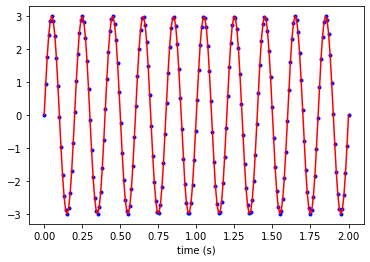

In [57]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.animation as animation
from IPython.display import display, Image
from IPython.display import HTML

def apc(t,s,f):
    te=t[1]-t[0]
    D=t[-1]-t[0]
    r=np.exp(2*1j*np.pi*f*t)
    ps=te*np.sum(s*np.conj(r))
    A=(2/D)*np.abs(ps)
    Ph=np.angle(ps)
    return A, Ph
    
fs=100
f0=5
A=3
T0=2
NP=T0*fs

t=np.linspace(0,T0,NP)

x=A*np.cos(2*np.pi*f0*t-np.pi/2)

[A_Est,Phi_Est]=apc(t,x,f0)

print(A_Est,Phi_Est)

x_Est=A_Est*np.cos(2*np.pi*f0*t+Phi_Est)

plt.plot(t,x,'.b')
plt.plot(t,x_Est,'r')
plt.xlabel('time (s)')

plt.savefig('SinEst1.png')
    

### Importation d'un fichier MatLab .mat

In [115]:
from scipy.io import loadmat
loadmat('lab_data_apc.mat')

t=data['t_samp']

print(t.ndim)
print(t.shape)
print(t.size)
print(t[0,1])

2
(1, 200)
200
0.0005


### Test de apc sur un signal sinusoïdal à $f_0=100 Hz$

20.42010050251256 -3.060000000000001


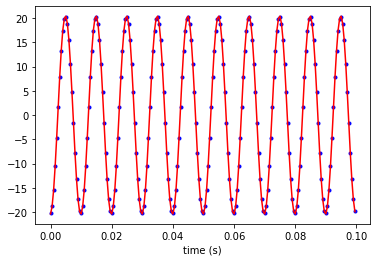

In [62]:
tt=data['t_samp']
ss=data['s_samp']
t=tt[0,]
s=ss[0,]
f0=100

[A_Est,Phi_Est]=apc(t,s,f0)

print(A_Est,Phi_Est)

x_Est=A_Est*np.cos(2*np.pi*f0*t+Phi_Est)

plt.plot(t,s,'.b')
plt.plot(t,x_Est,'r')
plt.xlabel('time (s)')

plt.savefig('SinEst2.png')

## Bilan et difficultés

- Les vecteurs de MatLab importés d'un .mat via *lodmat* se placent dans des arrays de dimension 2
- Le retour de la phase stimée en degrés `angle(ps,1)` ne donne pas la bonne valeur pour l'exo 2.

## Dépendance des valeurs estimées en fonction de la durée du signal

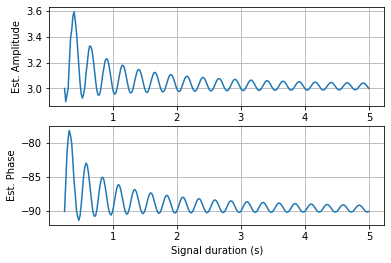

In [100]:
# import math
from math import floor

fs=20
f0=2
A=3

Dur=np.linspace(0.5/f0,5,2**8)
Len=Dur*fs
NP=np.size(Dur)

A_E=np.zeros(NP)
Phi_E=np.zeros(NP)
ind=-1

for T0 in Dur:
    ind+=1
    t=np.linspace(0,T0,math.floor(Len[ind]))
    x=A*np.cos(2*np.pi*f0*t-np.pi/2)
    [A_Est,Phi_Est]=apc(t,x,f0)
    A_E[ind]=A_Est
    Phi_E[ind]=Phi_Est*180/np.pi

plt.subplot(2,1,1)
plt.plot(Dur,A_E)
plt.ylabel('Est. Amplitude')
plt.grid()
plt.subplot(2,1,2)
plt.plot(Dur,Phi_E)
plt.ylabel('Est. Phase')
plt.xlabel('Signal duration (s)')
plt.grid()

plt.savefig('SinEst3.png')

## Dépendance des valeurs estimées en fonction de la fréquence $f_0$

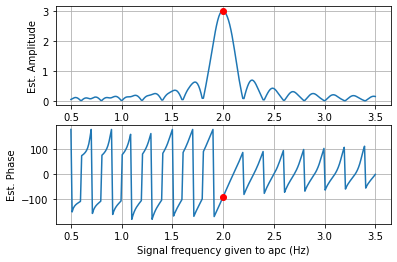

In [116]:
# import math
from math import floor

fs=20
f0=2
A=3
T0=5
NP=2**8
length=T0*fs
t=np.linspace(0,T0,math.floor(length))

ff=np.linspace(f0-1.5,f0+1.5,NP)

A_E=np.zeros(NP)
Phi_E=np.zeros(NP)
ind=-1

for ftest in ff:
    ind+=1
    x=A*np.cos(2*np.pi*ftest*t-np.pi/2)
    [A_Est,Phi_Est]=apc(t,x,f0)
    A_E[ind]=A_Est
    Phi_E[ind]=Phi_Est*180/np.pi

plt.subplot(2,1,1)
plt.plot(ff,A_E)
plt.plot(2.0,3.0,'or')
plt.ylabel('Est. Amplitude')
plt.grid()
plt.subplot(2,1,2)
plt.plot(ff,Phi_E)
plt.plot(2.0,-90,'or')
plt.ylabel('Est. Phase')
plt.xlabel('Signal frequency given to apc (Hz)')
plt.grid()

plt.savefig('SinEst4.png')

## Let's go for APFC !

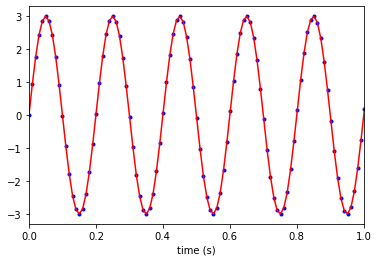

In [144]:

def apfc(t,s):
    global ftest, ps   # Insures ps availability for subsequent visualization 
    
    te=t[1]-t[0]
    D=t[-1]-t[0]
    fs=1/te
    ftest=np.linspace(0,fs/2,NP)
    ind=-1
    ps=np.zeros(NP, dtype='complex')
    ps_mod=np.zeros(NP)
    
    for f in ftest: 
        ind+=1
        r=np.exp(2*1j*np.pi*f*t)
        ps[ind]=te*np.sum(s*np.conj(r))

    ps_mod=np.abs(ps)   
    jack=np.where(ps_mod==np.max(ps_mod))
    f=ftest[jack]
    A=(2/D)*np.abs(ps[jack])
    Ph=np.angle(ps[jack]) 
    
    return f, A, Ph 


fs=100
f0=5
A=3
T0=5
NP=T0*fs
t=np.linspace(0,T0,NP)
x=A*np.cos(2*np.pi*f0*t-np.pi/2)

[f_est,A_est,Phi_est]=apfc(t,x)
x_est=A_est*np.cos(2*np.pi*f_est*t+Phi_est)

plt.plot(t,x,'.b')
plt.plot(t,x_est,'r')
plt.xlabel('time (s)')
plt.xlim(0,1)
plt.savefig('SinEst5.png')




Text(0, 0.5, '|scalar products|')

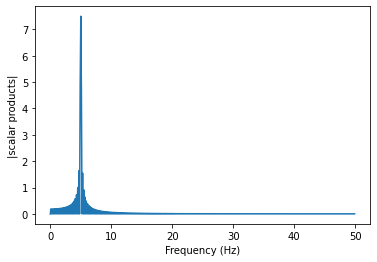

In [146]:
plt.plot(ftest,np.abs(ps))
plt.xlabel('Frequency (Hz)')
plt.ylabel('|scalar products|')